### Bar plots of the Graph Metrics for all Clusters in iterations=N

In [4]:
%matplotlib inline

import os
from pathlib import Path

import pickle
import matplotlib.pyplot as plt

In [2]:
# DNp01 (giant fiber) to DNp11
body_ids = ["2307027729","5813024015", "1565846637", "1405231475", "1466998977", "5813023322", "1100404581", "1226887763", "1228264951", "512851433", "5813026936", "1281324958"]
DNp_ids = [int(i) for i in body_ids]

In [9]:
# Define parameters to be used
metricName = 'degreeCentrality'
NUM_ITERS = 250

DIR = Path.cwd() / "data" / "consensusResults"
OUTPUT_DIR = Path.cwd() / "figures" / metricName

In [97]:
# make sub-directories in figures/ for each metricName
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [10]:
with open(DIR / f'{metricName}.pkl', 'rb') as handle:
    graphMetric = pickle.load(handle)

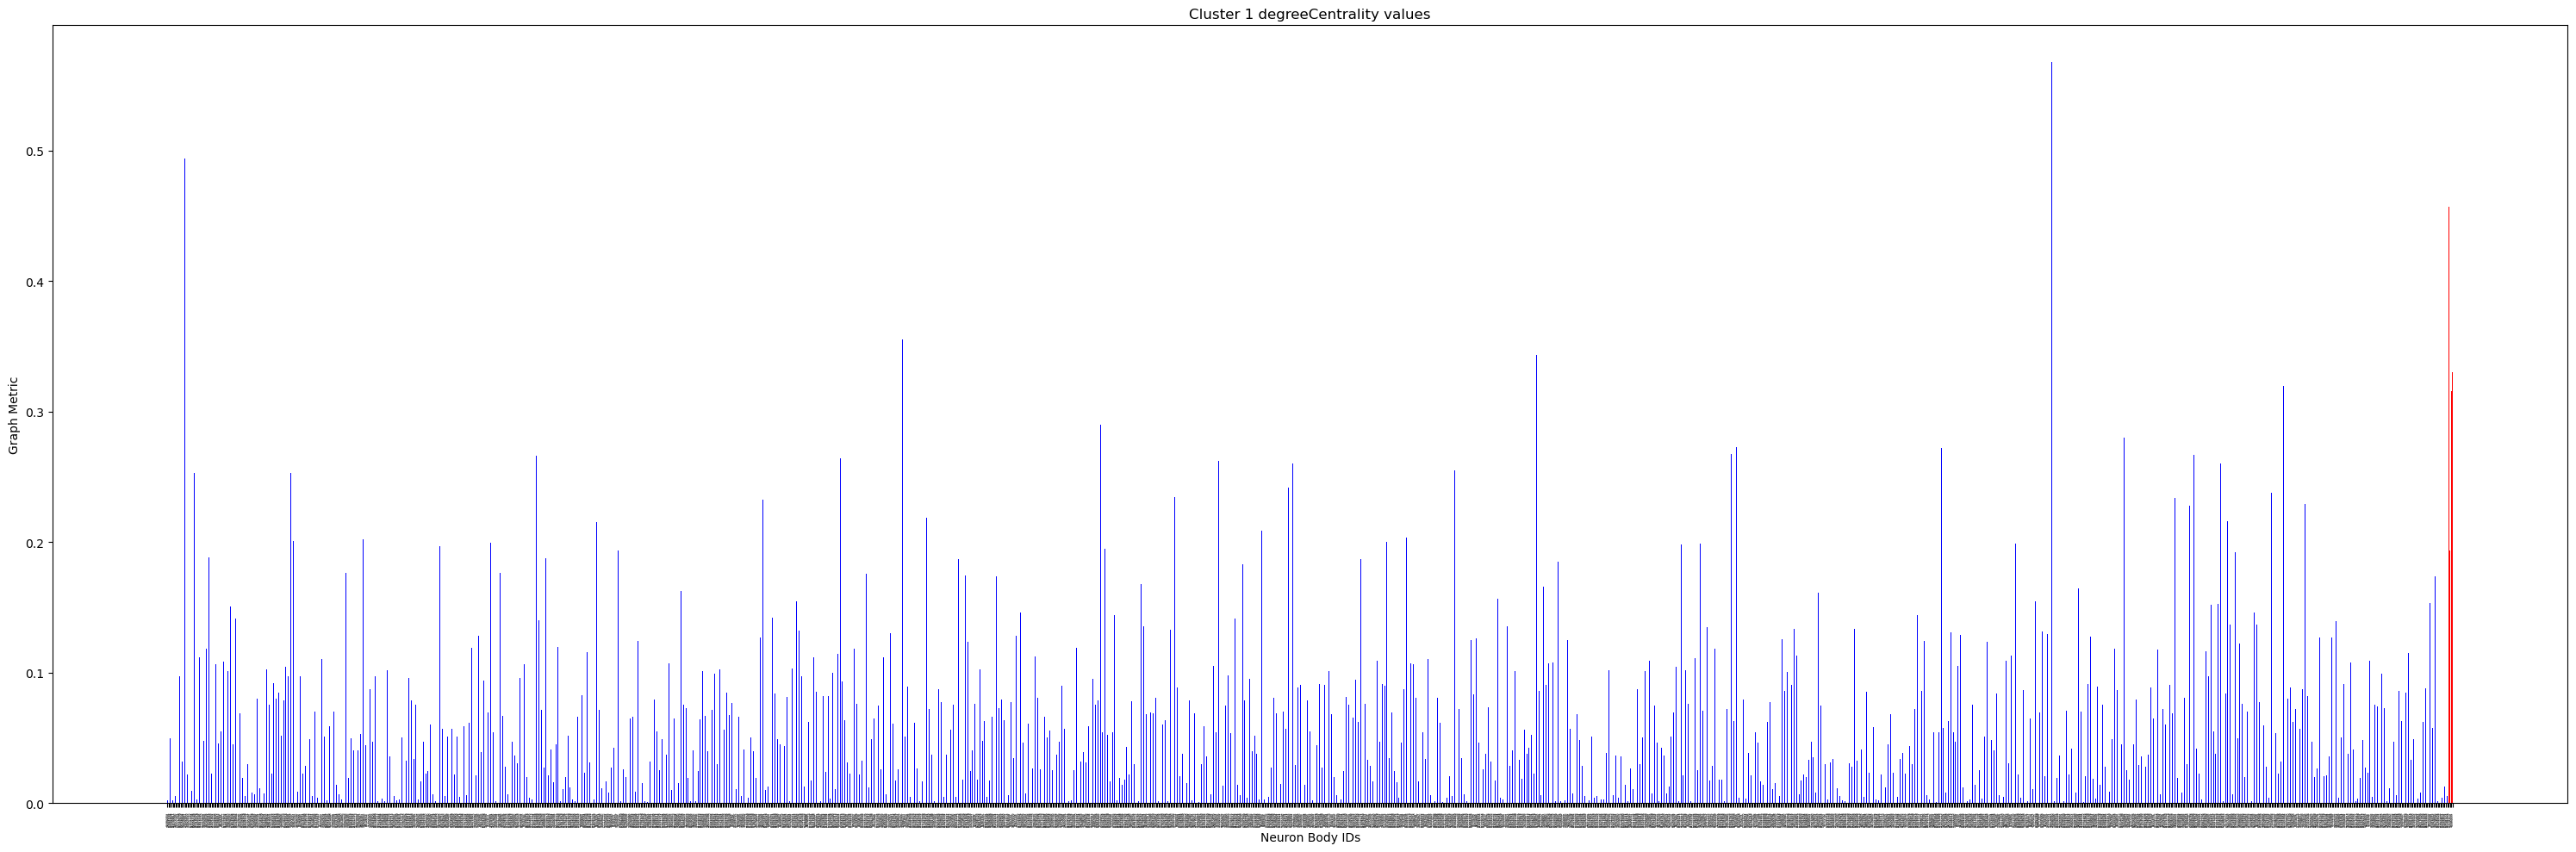

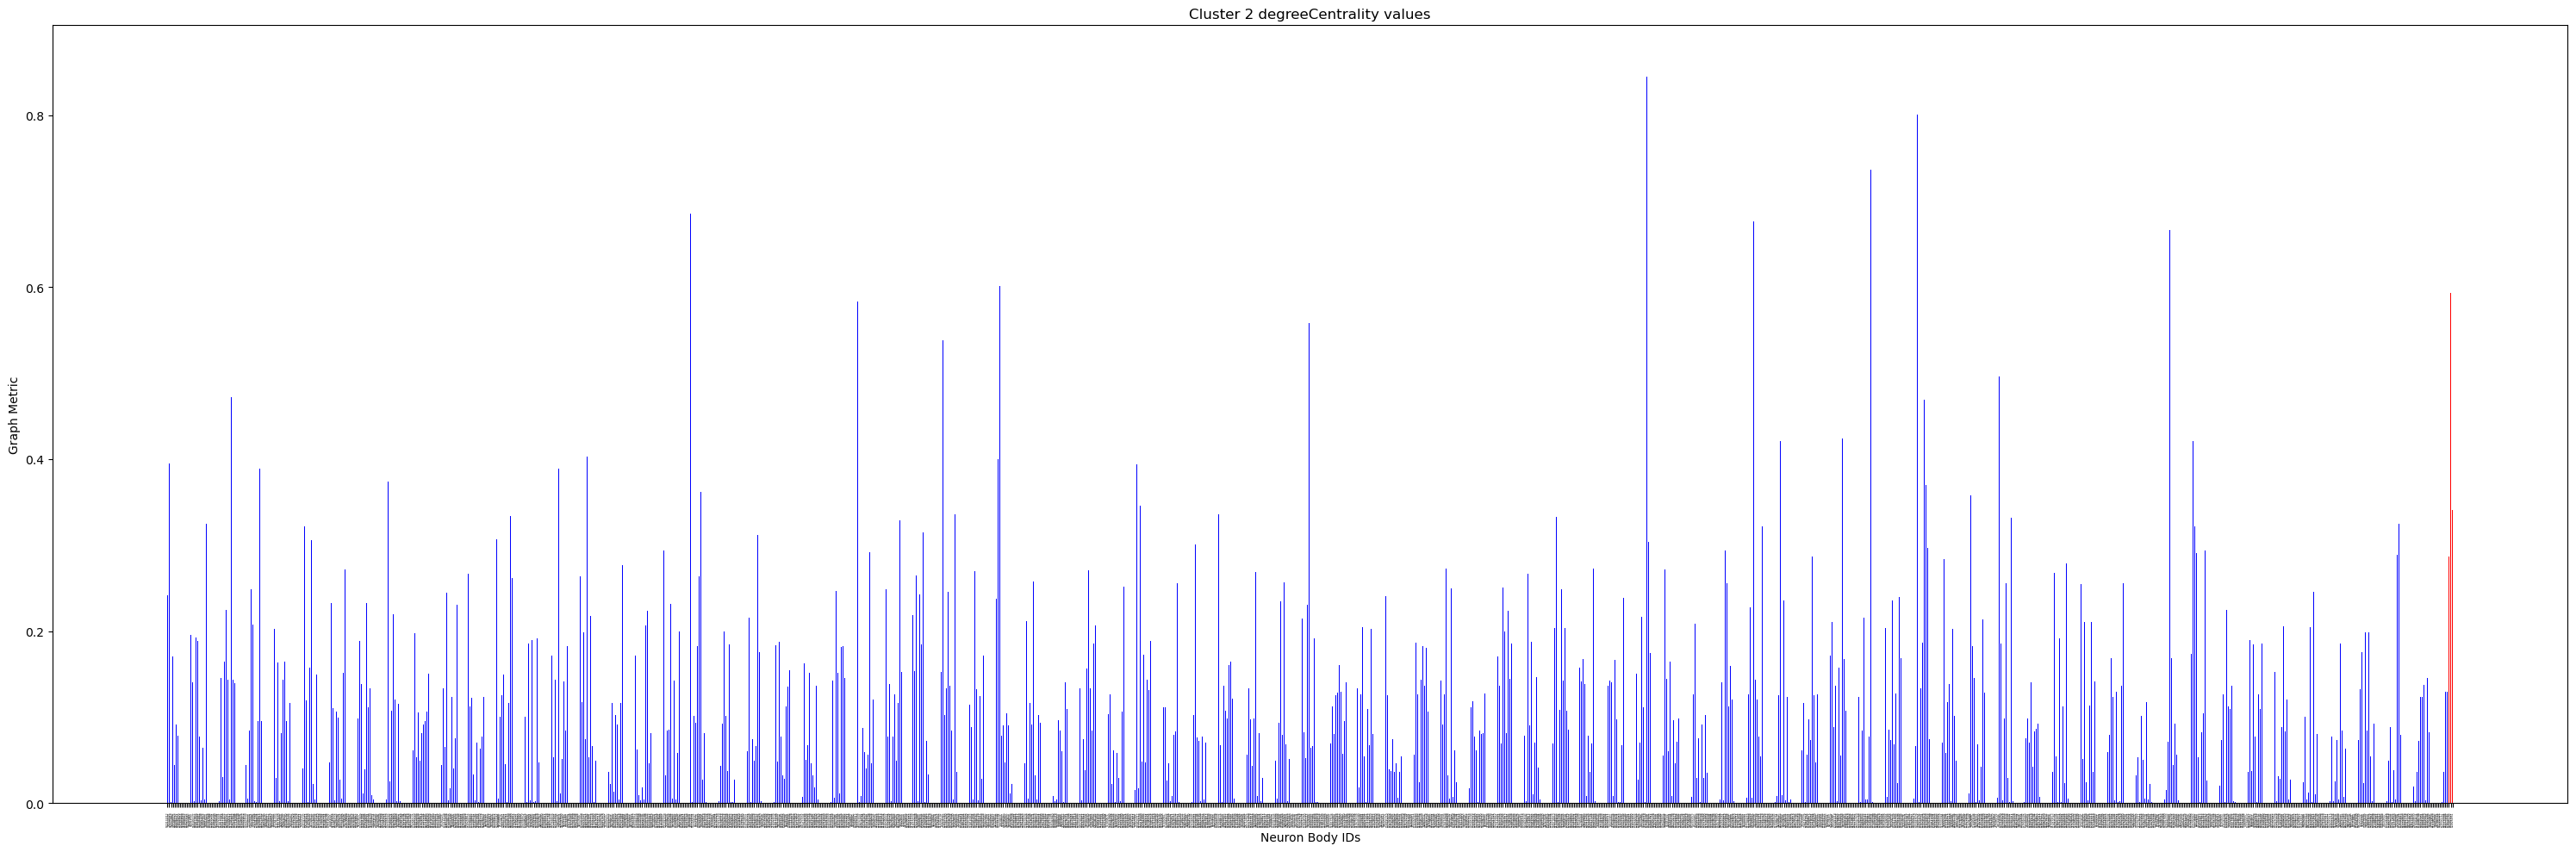

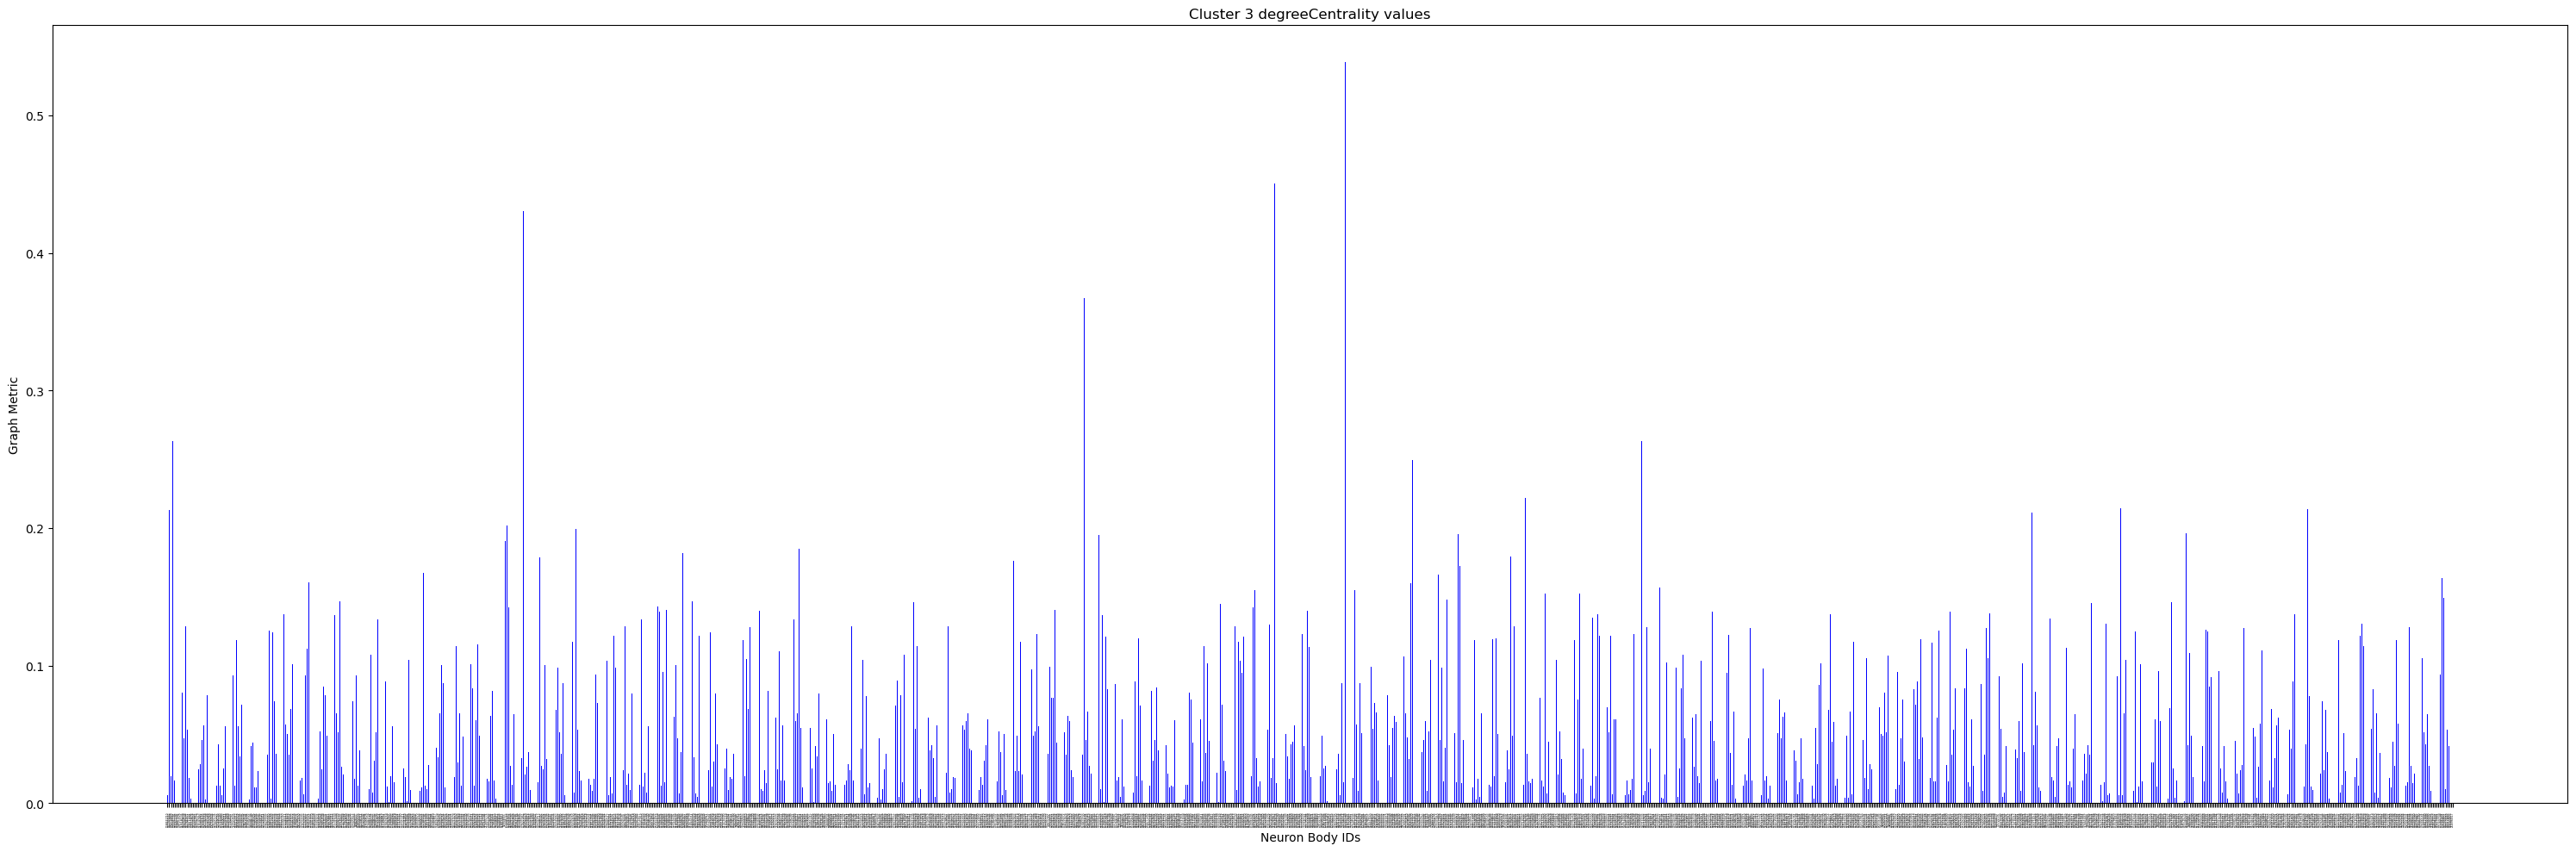

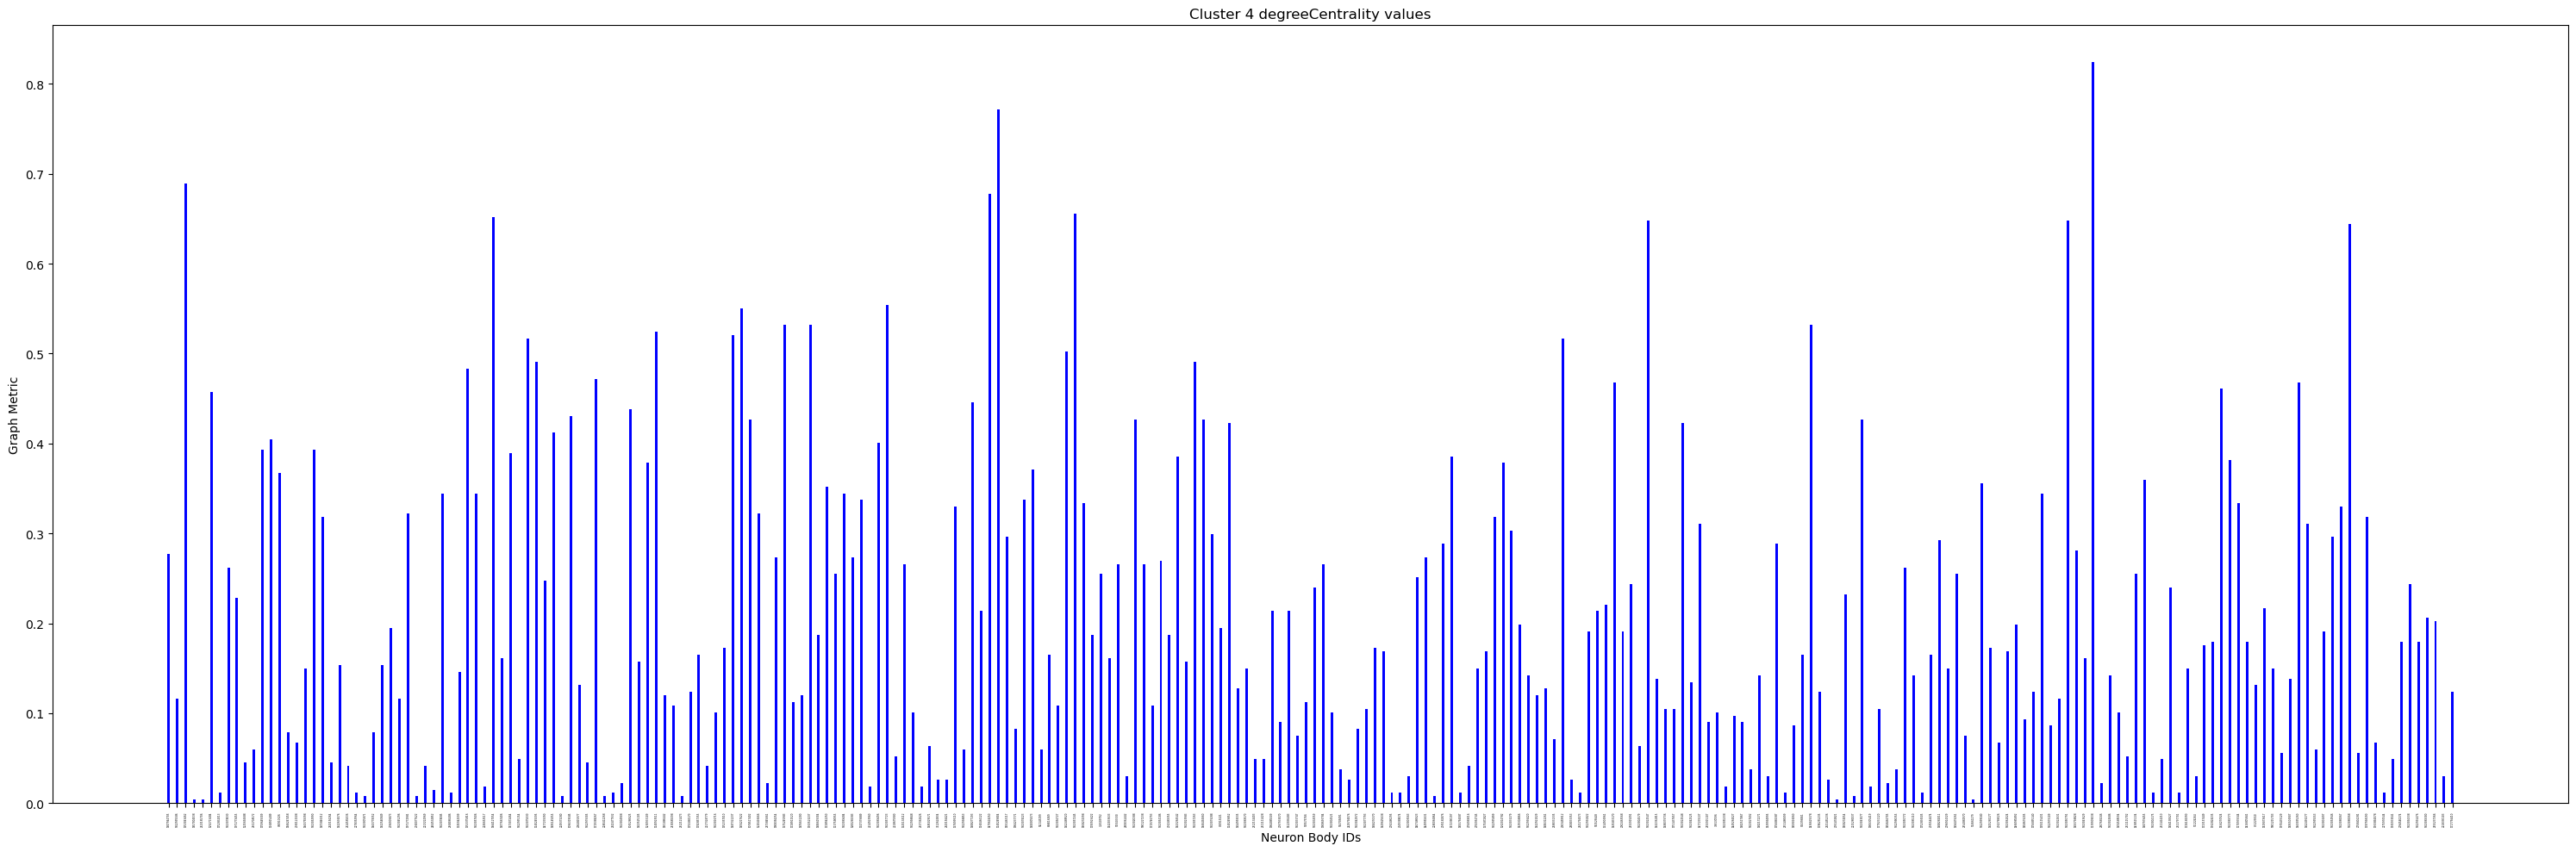

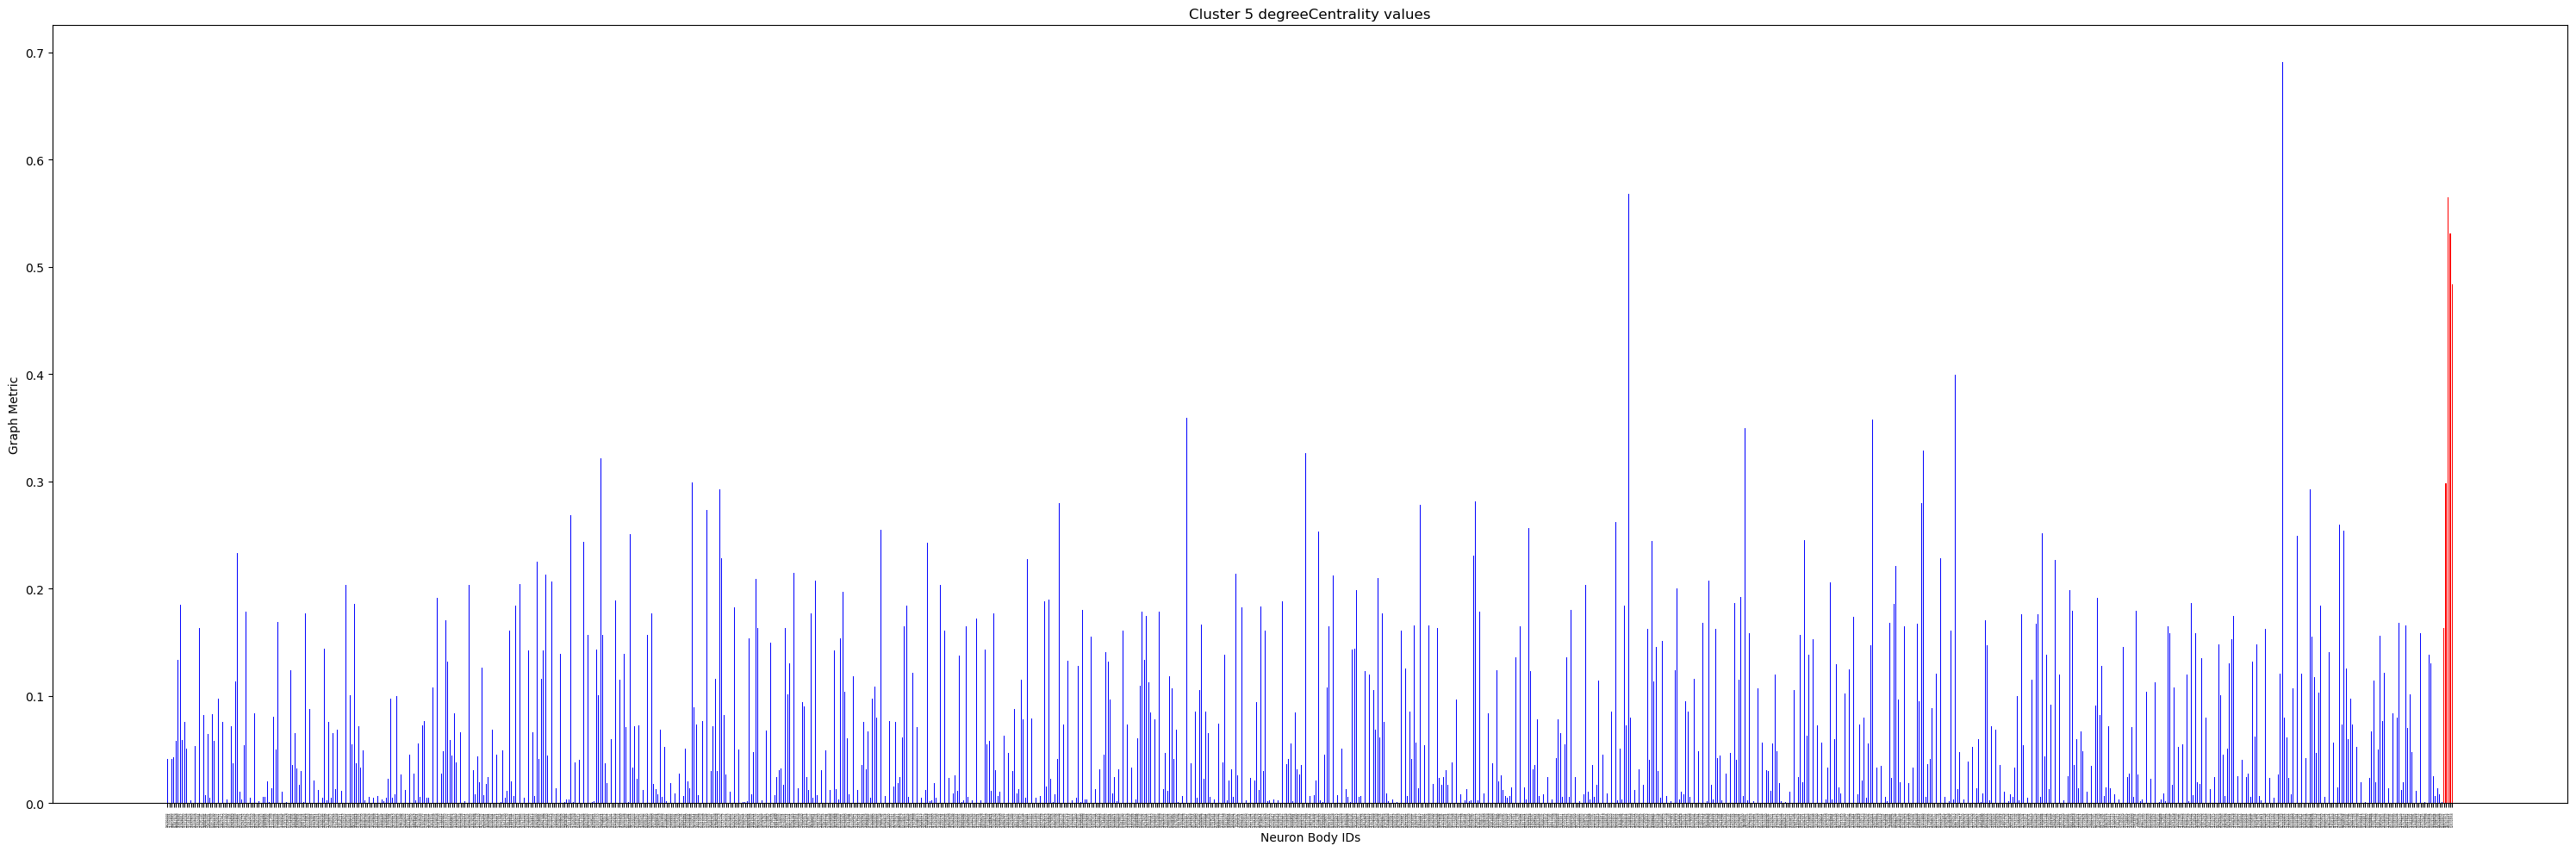

In [139]:
metrics_per_cluster = graphMetric[NUM_ITERS]

for i in range(len(metrics_per_cluster)):
    plt.figure(figsize=(30, 10))
    # fig, ax = plt.subplots(figsize=(30, 10))
    subject_ids, graphMetric_values = list(metrics_per_cluster[i].keys()), list(metrics_per_cluster[i].values())

    # Convert subject_ids to strings
    subject_ids = [str(id) for id in subject_ids]

    # 2 groups of bars: subject_ids in body_ids and subject_ids not in body_ids
    # Plot the bars not in body_ids first as blue; Plot the bars in body_ids as red

    # extract the first group of bars
    blue_bars = [value for id, value in zip(subject_ids, graphMetric_values) if id not in body_ids]
    blue_ids = [id for id in subject_ids if id not in body_ids]

    # extract the second group of bars
    red_bars = [value for id, value in zip(subject_ids, graphMetric_values) if id in body_ids]
    red_ids = [id for id in subject_ids if id in body_ids]

    # Plot the bars. Red bars should have lot of white space in between them
    plt.bar(blue_ids, blue_bars, color='b', width=0.3)
    plt.bar(red_ids, red_bars, color='r', width=0.7)

    plt.title(f'Cluster {i+1} {metricName} values')
    plt.xlabel('Neuron Body IDs')
    plt.ylabel('Graph Metric')

    # rotate x-axis labels
    plt.xticks(rotation='vertical')
    plt.tick_params(axis='x', which='major', labelsize=2)

    # increase spacing between x-axis labels
    # source: https://stackoverflow.com/questions/44863375/how-to-change-spacing-between-ticks
    """ N = len(blue_bars) + len(red_bars)
    plt.gca().margins(x=0)
    plt.gcf().canvas.draw()
    tl = plt.gca().get_xticklabels()
    maxsize = max([t.get_window_extent().width for t in tl])
    m = 0.2 # inch margin
    s = maxsize/plt.gcf().dpi*N+2*m
    margin = m/plt.gcf().get_size_inches()[0]

    plt.gcf().subplots_adjust(left=margin, right=1.-margin)
    plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1]) """

    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / f'cluster{i+1}.png', dpi=300)
    plt.show()
    # break

5813026936 0.4565727699530516
1565846637 0.1936619718309859
1100404581 0.31572769953051644
512851433 0.33039906103286387


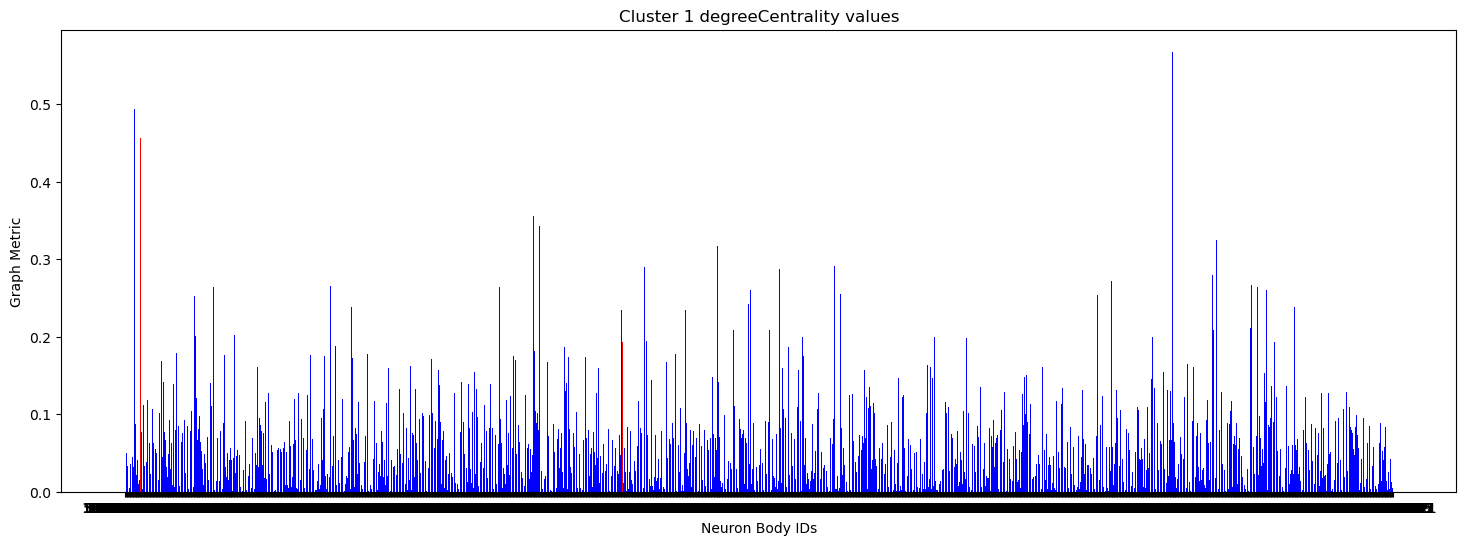

1226887763 0.2863813229571985
5813023322 0.5929961089494163
1228264951 0.3408560311284047


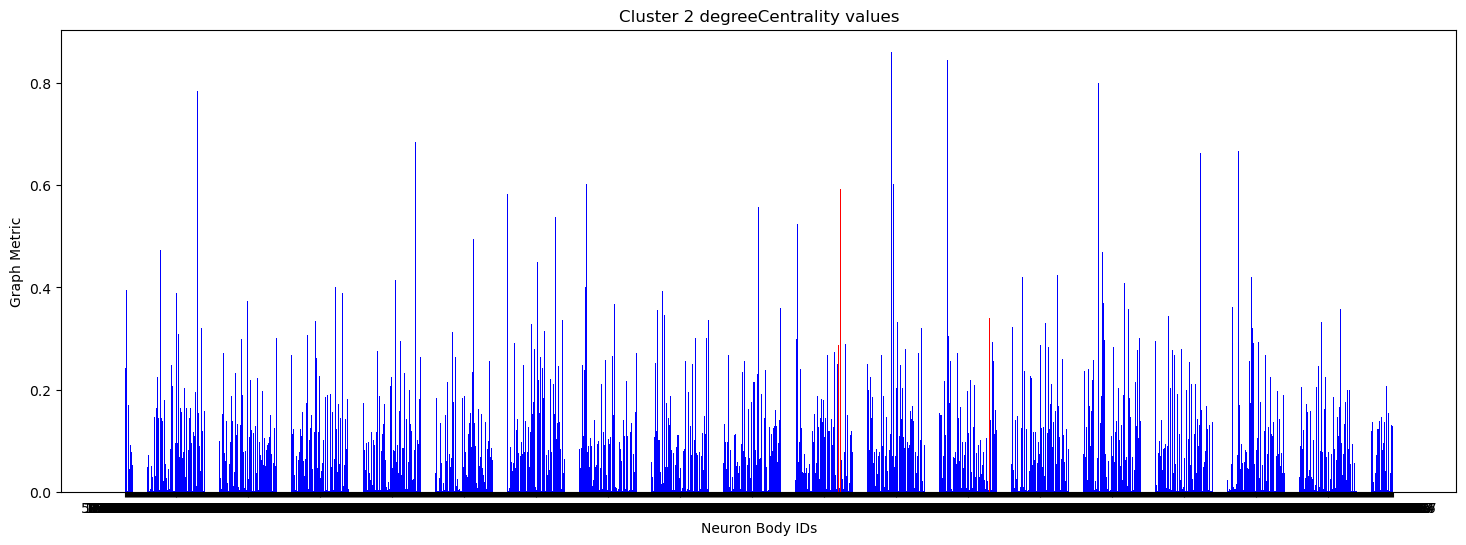

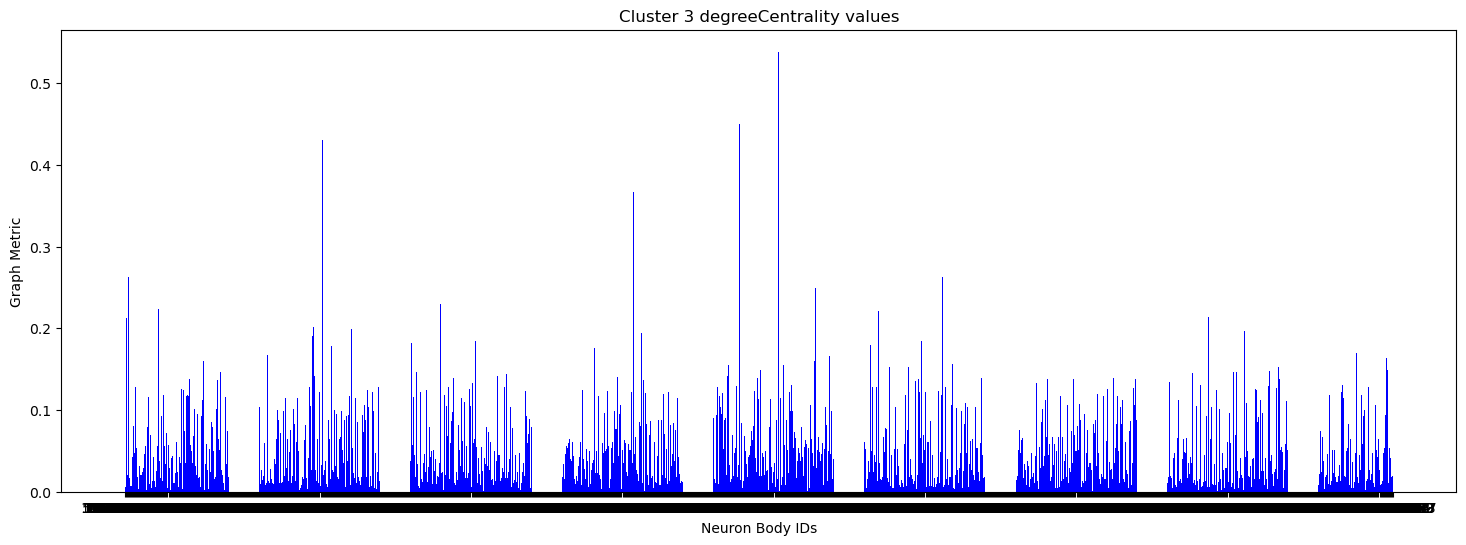

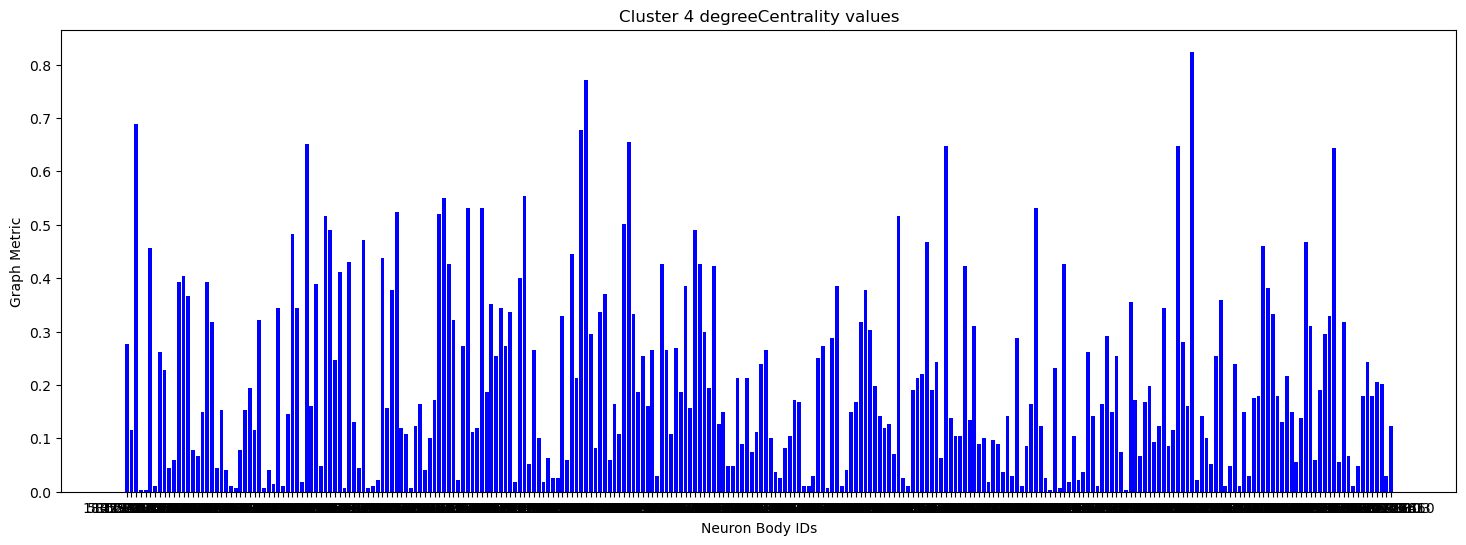

1466998977 0.16356877323420074
1405231475 0.2983271375464684
2307027729 0.5650557620817843
5813024015 0.5306691449814126
1281324958 0.483271375464684


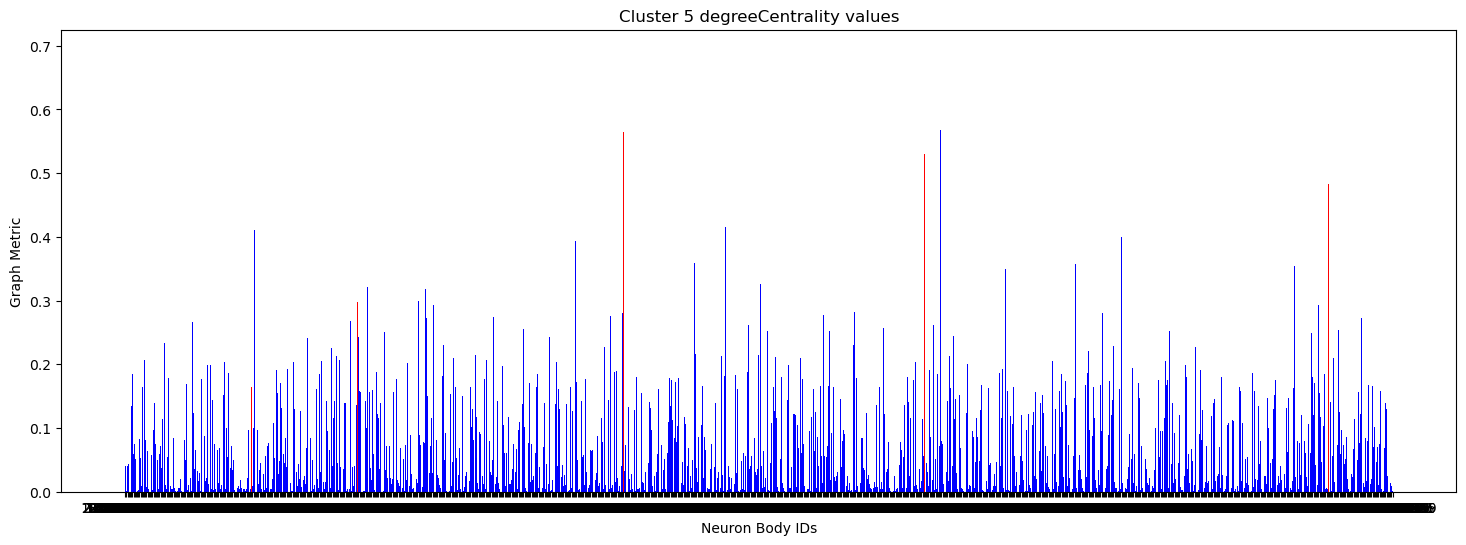

In [11]:
metrics_per_cluster = graphMetric[NUM_ITERS]

for i in range(len(metrics_per_cluster)):
    plt.figure(figsize=(18, 6))
    subject_ids, graphMetric_values = list(metrics_per_cluster[i].keys()), list(metrics_per_cluster[i].values())

    # Convert subject_ids to strings
    subject_ids = [str(id) for id in subject_ids]

    # Plot each bar individually, checking if it should be highlighted
    for id, value in zip(subject_ids, graphMetric_values):
        if id in body_ids:
            print(id, value)
            plt.bar(id, value, color='red')  # color the highlight bars red
        else:
            plt.bar(id, value, color='blue')

    plt.title(f'Cluster {i+1} {metricName} values')
    plt.xlabel('Neuron Body IDs')
    plt.ylabel('Graph Metric')
    # plt.savefig(OUTPUT_DIR / f'cluster{i+1}.png')
    plt.show()

5813026936 0.14254399441882737
1565846637 0.10761012664685271
1100404581 0.14784975676214127
512851433 0.023312339539052047
1226887763 0.02486118480468526
5813023322 0.18024842309113867
1228264951 0.02741098185681953
1466998977 0.03662409944089133
1405231475 0.12071032224878672
2307027729 0.559735878813852
5813024015 0.23729623580073103
1281324958 0.16070384241502295


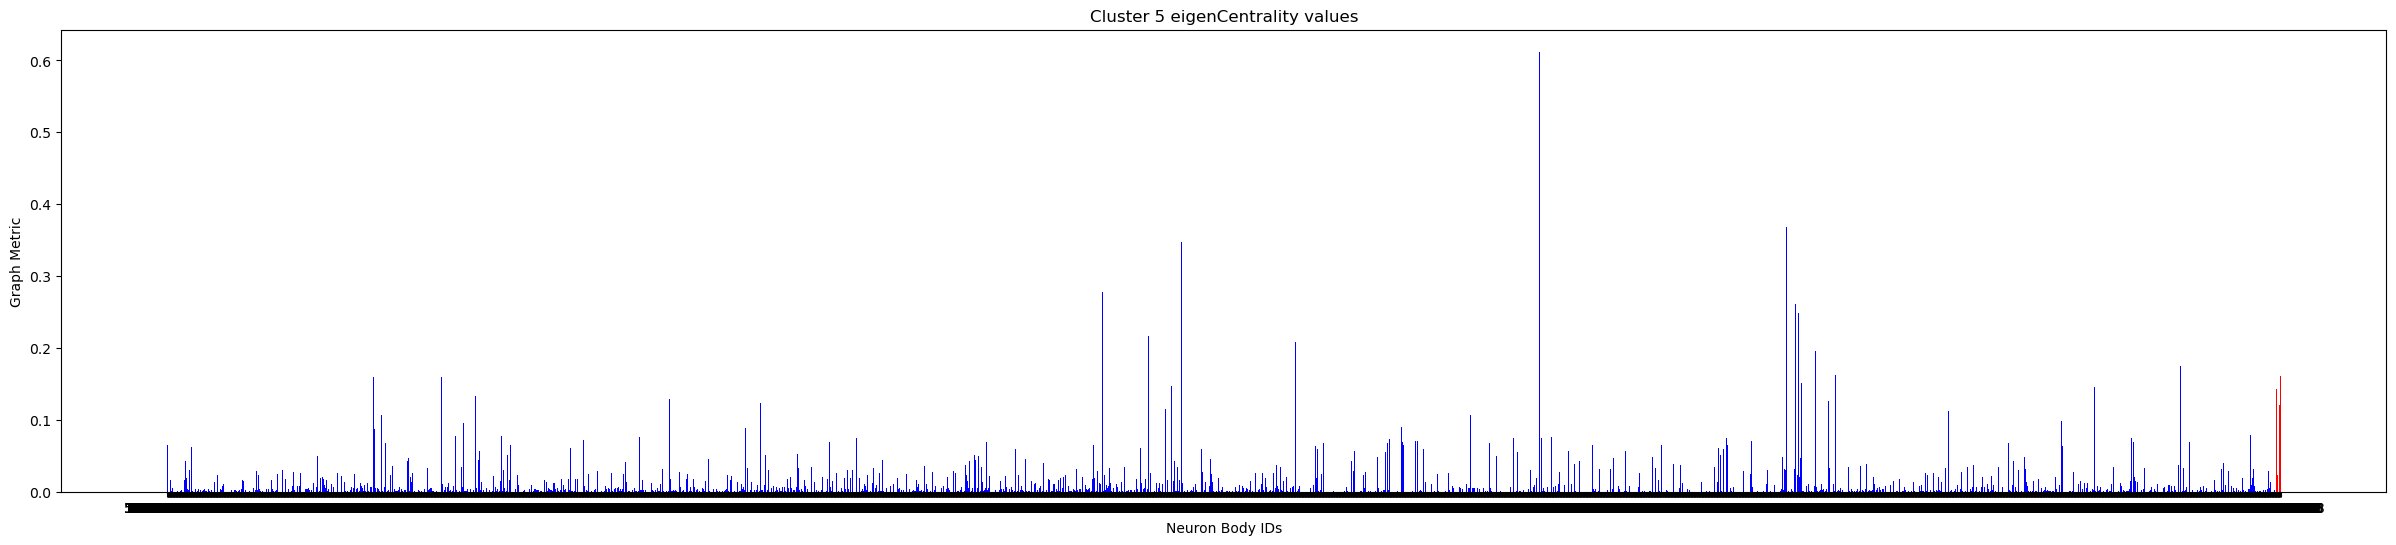

In [15]:
# plot all clusters in one figure

iter250 = graphMetric[250]
subject_ids, graphMetric_values = [], []
for i in range(len(iter250)):
    subject_ids.extend(list(iter250[i].keys()))
    graphMetric_values.extend(list(iter250[i].values()))

# scale graphMetric_values by 1000
# graphMetric_values = [i*1000 for i in graphMetric_values]

# Convert subject_ids to strings
subject_ids = [str(id) for id in subject_ids]

plt.figure(figsize=(30, 6))

# Plot each bar individually, checking if it should be highlighted
for id, value in zip(subject_ids, graphMetric_values):
    if id not in body_ids:
        plt.bar(id, value, color='blue')

for id, value in zip(subject_ids, graphMetric_values):
    if id in body_ids:
        print(id, value)
        plt.bar(id, value, color='red')  # color the highlight bars red

plt.title(f'Cluster {i+1} {metricName} values')
plt.xlabel('Neuron Body IDs')
plt.ylabel('Graph Metric')
# plt.savefig(f'./figures/{metricName}/cluster{i+1}.png')
plt.show()

In [16]:
min(graphMetric_values), max(graphMetric_values), sum(graphMetric_values)/len(graphMetric_values)

(-2.0816681711721682e-17, 0.6121095817204566, 0.009930580382796289)